# Noising Experiments
In this notebook i will:
1. Insert noise (with different parameters, if applicable) in a default image (colored noise k = 6)
2. Extract the metrics of the noised images with different parameters
3. Generate the curve that represents the noise used
4. Insert noise on images of the dataset and see if it gets near the curve generated at step 3

## Speckle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import utils.noise_generator as noise_gen
from utils.images_generator import speckle_noise_gs, normalize_img_to_0_255, generate_histogram, colored_noise, uniform_image, add_speckle_noise
from utils.experiments_functions import get_img_info
from skimage import data
from skimage.color import rgb2gray

### Default Image

Generating default image

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:51: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:51: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


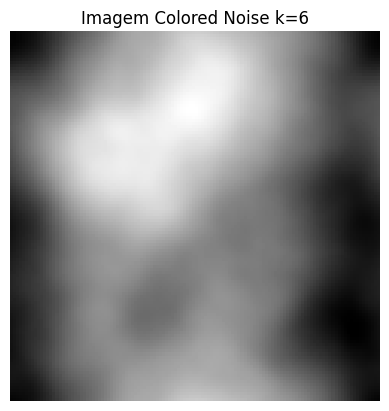

(122, 122)


In [29]:
# generates the default image (colored noise k=6)
gs_image = colored_noise(6, (122, 122))
# normalize to 0-255
gs_image = normalize_img_to_0_255(gs_image)
plt.imshow(gs_image, cmap='gray')
plt.title(f"Imagem Colored Noise k=6")
plt.axis('off')  # Remove os eixos
plt.show()
print(gs_image.shape)

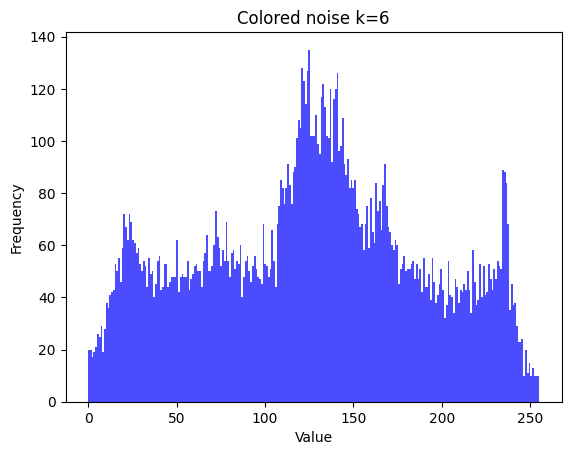

In [30]:
generate_histogram(gs_image, isNormalized=True, title=f'Colored noise k=6')

Generating the noised images

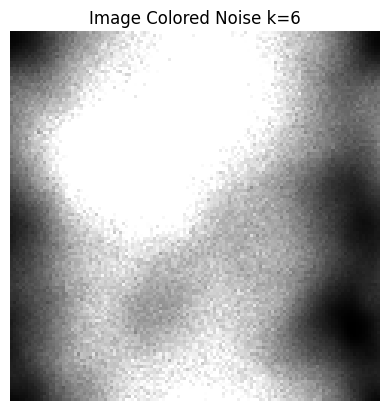

(122, 122)


In [35]:
noised_image = add_speckle_noise(gs_image, intensity=0.9, mean=0.5, sigma=0.1)
plt.imshow(noised_image, cmap='gray')
plt.title(f"Image Colored Noise k=6")
plt.axis('off')
plt.show()
print(noised_image.shape)

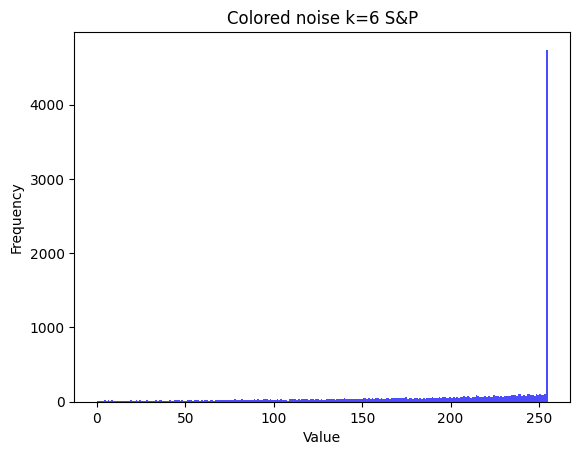

In [22]:
generate_histogram(noised_image, isNormalized=True, title=f'Colored noise k=6 S&P')

In [33]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [37]:
# sets the default images 
default_images = {
    'colored_k6':normalize_img_to_0_255(colored_noise(6, (122, 122))),
    'uniform 127':uniform_image(127, (122, 122))
}
# intensities
speckle_intensities = [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]
# stores all the metrics of each image in a list
q_linspace = np.linspace(-2, 20, num = 23)
q_linspace = [0]
# stores all the metrics of each image in a list
image_data_list = []
for gs_image_name in default_images:
    gs_image = default_images[gs_image_name]
    for intensity in speckle_intensities:
        print(f"Intensity = {intensity}")
        # generate noise image
        print("Generating noised image")
        noised_image =  add_speckle_noise(gs_image, intensity=intensity, mean=0.5, sigma=0.1)
        # extract metrics
        print("Extracting data")
        noised_image_data = get_img_info(noised_image, q_linspace = q_linspace)
        # add the information
        noised_image_data['image_name'] = gs_image_name
        noised_image_data['noise_intensity'] = intensity
        image_data_list.append(noised_image_data)

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:51: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:51: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


Intensity = 0.0
Generating noised image
Extracting data
Intensity = 0.1
Generating noised image
Extracting data
Intensity = 0.2
Generating noised image
Extracting data
Intensity = 0.3
Generating noised image
Extracting data
Intensity = 0.4
Generating noised image
Extracting data
Intensity = 0.5
Generating noised image
Extracting data
Intensity = 0.6
Generating noised image
Extracting data
Intensity = 0.7
Generating noised image
Extracting data
Intensity = 0.8
Generating noised image
Extracting data
Intensity = 0.9
Generating noised image
Extracting data
Intensity = 1.0
Generating noised image
Extracting data
Intensity = 0.0
Generating noised image
Extracting data
Intensity = 0.1
Generating noised image
Extracting data
Intensity = 0.2
Generating noised image
Extracting data
Intensity = 0.3
Generating noised image
Extracting data
Intensity = 0.4
Generating noised image
Extracting data
Intensity = 0.5
Generating noised image
Extracting data
Intensity = 0.6
Generating noised image
Extracti

In [38]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux.to_csv(f"results/noise_analysis/speckle/speckle_analysis_default.csv", index = False)

### Dataset Images
1. Take 1 image from each of the 25 classes of the Sintorn Dataset
2. Insert noise with different probabilities
3. extract metrics and insert in the previous dataframe

In [40]:
# reads 1 image from each class
images_path = f'data/Sintorn/hardware'
rot = 'r000'
seg = 's001'
images_filenames = []
for file in os.listdir(images_path):
    if file.endswith(f"{rot}-{seg}.png"):
        images_filenames.append(file)
print(len(images_filenames))

25


Testing histogram

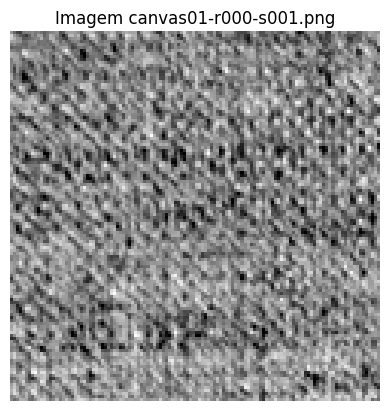

(122, 122)


In [41]:
img_filename = images_filenames[1]
gs_image = cv2.imread(f'{images_path}/{img_filename}', cv2.IMREAD_GRAYSCALE)
plt.imshow(gs_image, cmap='gray')
plt.title(f"Imagem {img_filename}")
plt.axis('off')  # Remove os eixos
plt.show()
print(gs_image.shape)

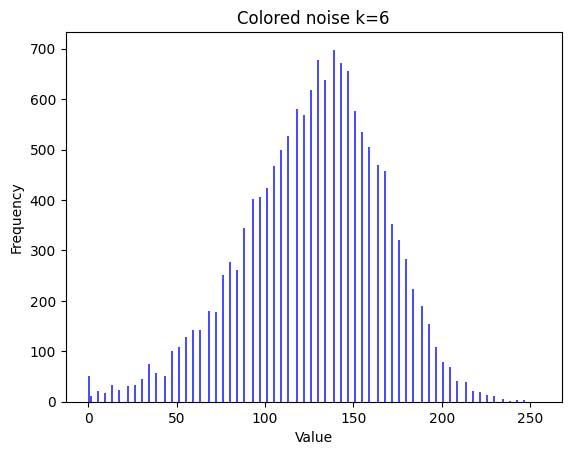

In [42]:
generate_histogram(gs_image, isNormalized=True, title=f'Colored noise k=6')

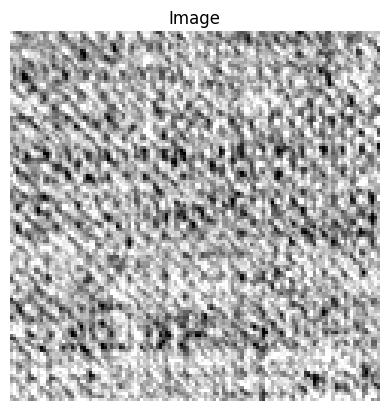

(122, 122)


In [43]:
noised_image = add_speckle_noise(gs_image, intensity=0.7, mean=0.5, sigma=0.1)
plt.imshow(noised_image, cmap='gray')
plt.title(f"Image")
plt.axis('off')
plt.show()
print(noised_image.shape)

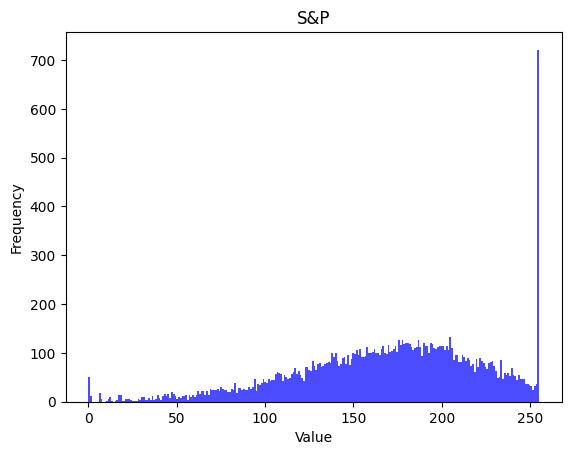

In [44]:
generate_histogram(noised_image, isNormalized=True, title=f'S&P')

Extracting metrics for each image with each parameter

In [45]:
# intensities
speckle_intensities = [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]
# stores all the metrics of each image in a list
q_linspace = np.linspace(-2, 20, num = 23)
q_linspace = [0]
# stores all the metrics of each image in a list
image_data_list = []
for idx, img_filename in enumerate(images_filenames):
    gs_image = cv2.imread(f'{images_path}/{img_filename}', cv2.IMREAD_GRAYSCALE)
    image_title = img_filename.split('.')[0]
    print(image_title, f"{idx+1}/{len(images_filenames)}")
    for intensity in speckle_intensities:
        print(f"Intensity = {intensity}")
        # generate noise image
        print("Generating noised image")
        noised_image =  add_speckle_noise(gs_image, intensity=intensity, mean=0.5, sigma=0.1)
        # extract metrics
        print("Extracting data")
        noised_image_data = get_img_info(noised_image, q_linspace = q_linspace)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_intensity'] = intensity
        image_data_list.append(noised_image_data)

canesugar01-r000-s001 1/25
Intensity = 0.0
Generating noised image
Extracting data
Intensity = 0.1
Generating noised image
Extracting data
Intensity = 0.2
Generating noised image
Extracting data
Intensity = 0.3
Generating noised image
Extracting data
Intensity = 0.4
Generating noised image
Extracting data
Intensity = 0.5
Generating noised image
Extracting data
Intensity = 0.6
Generating noised image
Extracting data
Intensity = 0.7
Generating noised image
Extracting data
Intensity = 0.8
Generating noised image
Extracting data
Intensity = 0.9
Generating noised image
Extracting data
Intensity = 1.0
Generating noised image
Extracting data
canvas01-r000-s001 2/25
Intensity = 0.0
Generating noised image
Extracting data
Intensity = 0.1
Generating noised image
Extracting data
Intensity = 0.2
Generating noised image
Extracting data
Intensity = 0.3
Generating noised image
Extracting data
Intensity = 0.4
Generating noised image
Extracting data
Intensity = 0.5
Generating noised image
Extracting da

In [46]:
data_ss = pd.concat(image_data_list, ignore_index=True)
data_ss.to_csv(f"results/noise_analysis/speckle/speckle_analysis.csv", index = False)

### SKIMAGE

In [24]:
def add_speckle_noise_2(image=np.ones((256, 256)), mean=0, sigma=10):
    """
    Add speckle noise to an image.
    
    Speckle noise is a multiplicative noise that follows the equation:
    J = I + n*I = I(1 + n)
    where I is the input image and n is Gaussian noise with mean and sigma.
    
    Parameters:
    image (numpy.ndarray(np.uint8)): Input image (Intensities in range [0, 255])
    mean (float): Mean of the Gaussian distribution
    sigma (float): Standard deviation of the Gaussian distribution
    
    Returns:
    numpy.ndarray(np.uint8): Image with added speckle noise
    """

    # check if input is a numpy array
    if not isinstance(image, np.ndarray):
        raise TypeError("Input must be a numpy array")
    
    # check if dtype is uint8
    if image.dtype != np.uint8:
        raise ValueError("Image must be of dtype uint8")
    
    # check if pixel values are in range [0, 255]
    if image.min() < 0 or image.max() > 255:
        raise ValueError("Pixel values must be in the range [0, 255]")
    # convert to [0, 1] range
    image = (image/255).astype(np.float64)
    # extracts shape
    row,col= image.shape
    # generates gaussian values
    gauss = np.random.normal(mean,sigma,(row,col))
    # makes sure the shape of the values match the image
    gauss = gauss.reshape(row,col)
    # generates noised image
    noisy = image + image * gauss
    # extracts the min and max of the noised image
    noisy_min = noisy.min()
    noisy_max = noisy.max()    
    # normalize to [0, 255]
    normalized = ((noisy - noisy_min) / (noisy_max - noisy_min) * 255).astype(np.uint8)
    return normalized

uint8
MIN 0 MAX 255


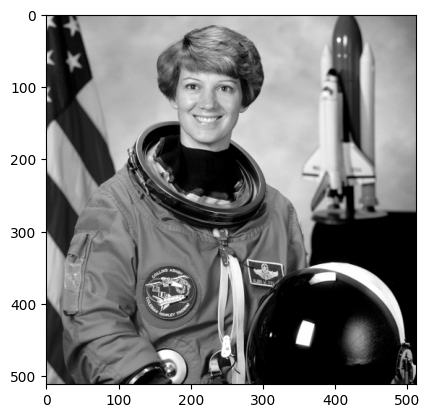

In [25]:
astronaut_image = data.astronaut()
astronaut_image = (rgb2gray(astronaut_image)*255).astype(np.uint8)
# astronaut_image = data.coins()
plt.imshow(astronaut_image, cmap='gray')
print(astronaut_image.dtype)
print("MIN", astronaut_image.min(), "MAX", astronaut_image.max())

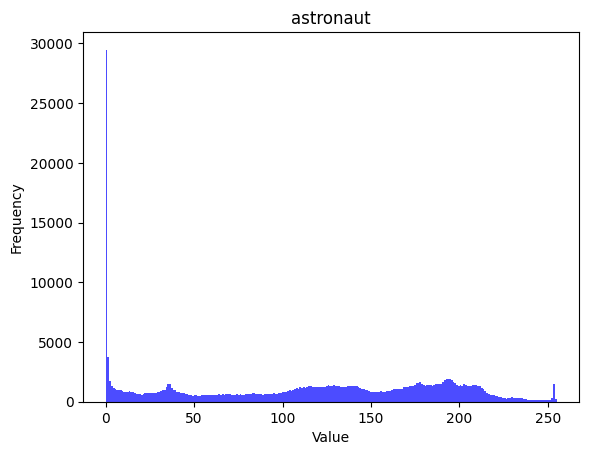

In [26]:
generate_histogram(astronaut_image, isNormalized=True, title=f'astronaut')

uint8
0
255
105.3647689819336


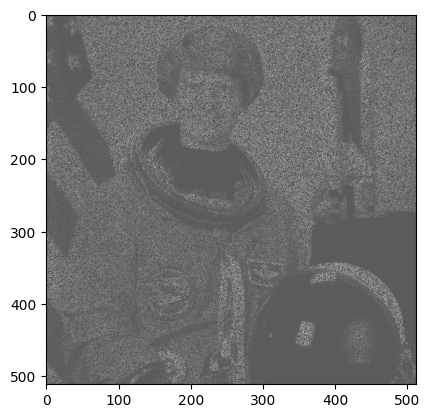

In [35]:
mean=0
sigma=0.9
noised_image = noise_gen.add_speckle_noise(astronaut_image, mean=mean, sigma=sigma)
plt.imshow(noised_image, cmap='gray')
print(noised_image.dtype)
print(noised_image.min())
print(noised_image.max())
print(noised_image.mean())

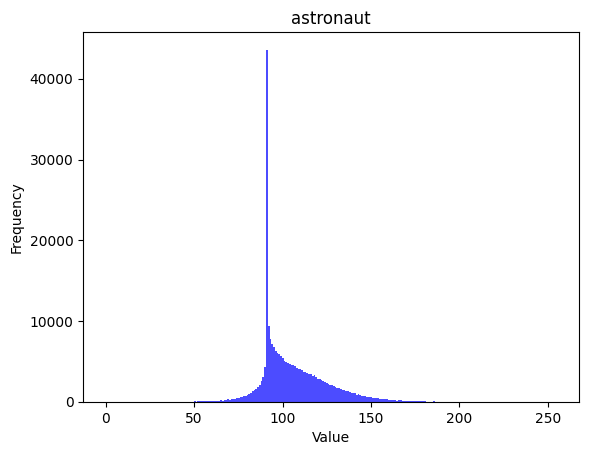

In [36]:
generate_histogram(noised_image, isNormalized=True, title=f'astronaut')

In [37]:
skimage_images = {
    'data.astronaut': (rgb2gray(data.astronaut())*255).astype(np.uint8),
    'data.cat': (rgb2gray(data.cat())*255).astype(np.uint8),
    'data.coins': data.coins()
}

In [38]:
for idx, skimage_name in enumerate(skimage_images):
    # reads the image
    gs_image = skimage_images[skimage_name]
    image_title = skimage_name.split('.')[1]
    print("\t",image_title)
    print("Size:", gs_image.shape)

	 astronaut
Size: (512, 512)
	 cat
Size: (300, 451)
	 coins
Size: (303, 384)


In [48]:
import itertools
def generate_parameter_combinations(speckle_intensities, speckle_means, speckle_sigmas):
    """
    Generate all combinations of parameter values from the given arrays.
    
    Args:
        speckle_intensities (list): List of intensity values
        speckle_means (list): List of mean values
        speckle_sigmas (list): List of sigma values
        
    Returns:
        list: List of dictionaries, each containing a unique combination of parameters
    """
    # Generate all combinations using itertools.product
    all_combinations = list(itertools.product(speckle_intensities, speckle_means, speckle_sigmas))
    
    # Convert to a more readable format (list of dictionaries)
    result = []
    for intensity, mean, sigma in all_combinations:
        result.append({
            'speckle_intensity': intensity,
            'speckle_mean': mean,
            'speckle_sigma': sigma
        })
    
    return result
# parameters
speckle_intensities = [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]
speckle_means = [-1, 0, 1]
speckle_sigmas = [0.05, 0.1, 0.2, 0.4]
for parameter_values in generate_parameter_combinations(speckle_intensities, speckle_means, speckle_sigmas):
    print(parameter_values['speckle_intensity'], parameter_values['speckle_mean'], parameter_values['speckle_sigma'])

0.0 -1 0.05
0.0 -1 0.1
0.0 -1 0.2
0.0 -1 0.4
0.0 0 0.05
0.0 0 0.1
0.0 0 0.2
0.0 0 0.4
0.0 1 0.05
0.0 1 0.1
0.0 1 0.2
0.0 1 0.4
0.1 -1 0.05
0.1 -1 0.1
0.1 -1 0.2
0.1 -1 0.4
0.1 0 0.05
0.1 0 0.1
0.1 0 0.2
0.1 0 0.4
0.1 1 0.05
0.1 1 0.1
0.1 1 0.2
0.1 1 0.4
0.2 -1 0.05
0.2 -1 0.1
0.2 -1 0.2
0.2 -1 0.4
0.2 0 0.05
0.2 0 0.1
0.2 0 0.2
0.2 0 0.4
0.2 1 0.05
0.2 1 0.1
0.2 1 0.2
0.2 1 0.4
0.3 -1 0.05
0.3 -1 0.1
0.3 -1 0.2
0.3 -1 0.4
0.3 0 0.05
0.3 0 0.1
0.3 0 0.2
0.3 0 0.4
0.3 1 0.05
0.3 1 0.1
0.3 1 0.2
0.3 1 0.4
0.4 -1 0.05
0.4 -1 0.1
0.4 -1 0.2
0.4 -1 0.4
0.4 0 0.05
0.4 0 0.1
0.4 0 0.2
0.4 0 0.4
0.4 1 0.05
0.4 1 0.1
0.4 1 0.2
0.4 1 0.4
0.5 -1 0.05
0.5 -1 0.1
0.5 -1 0.2
0.5 -1 0.4
0.5 0 0.05
0.5 0 0.1
0.5 0 0.2
0.5 0 0.4
0.5 1 0.05
0.5 1 0.1
0.5 1 0.2
0.5 1 0.4
0.6 -1 0.05
0.6 -1 0.1
0.6 -1 0.2
0.6 -1 0.4
0.6 0 0.05
0.6 0 0.1
0.6 0 0.2
0.6 0 0.4
0.6 1 0.05
0.6 1 0.1
0.6 1 0.2
0.6 1 0.4
0.7 -1 0.05
0.7 -1 0.1
0.7 -1 0.2
0.7 -1 0.4
0.7 0 0.05
0.7 0 0.1
0.7 0 0.2
0.7 0 0.4
0.7 1 0.05
0.7 1 0.1
0.7 

In [39]:
# parameters
speckle_means = [0]
speckle_sigmas = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# stores all the metrics of each image in a list
q_linspace = np.linspace(-2, 20, num = 23)
q_linspace = [0]
# stores all the metrics of each image in a list
image_data_list = []
for idx, skimage_name in enumerate(skimage_images):
    # reads the image
    gs_image = skimage_images[skimage_name]
    image_title = skimage_name.split('.')[1]
    print(image_title, f"{idx+1}/{len(skimage_images)}")
    # adds noise
    for mean in speckle_means:
        for sigma in speckle_sigmas:
            print(f"Mean = {mean}; sigma = {sigma}")
            # generate noise image
            print("Generating noised image")
            noised_image = noise_gen.add_speckle_noise(gs_image, mean=mean, sigma=sigma)
            # extract metrics
            print("Extracting data")
            noised_image_data = get_img_info(noised_image, q_linspace = q_linspace)
            # add the information
            noised_image_data['image_name'] = skimage_name
            noised_image_data['noise_mean'] = mean
            noised_image_data['noise_sigma'] = sigma
            image_data_list.append(noised_image_data)

astronaut 1/3
Mean = 0; sigma = 0.05
Generating noised image
Extracting data
Mean = 0; sigma = 0.1
Generating noised image
Extracting data
Mean = 0; sigma = 0.2
Generating noised image
Extracting data
Mean = 0; sigma = 0.3
Generating noised image
Extracting data
Mean = 0; sigma = 0.4
Generating noised image
Extracting data
Mean = 0; sigma = 0.5
Generating noised image
Extracting data
Mean = 0; sigma = 0.6
Generating noised image
Extracting data
Mean = 0; sigma = 0.7
Generating noised image
Extracting data
Mean = 0; sigma = 0.8
Generating noised image
Extracting data
Mean = 0; sigma = 0.9
Generating noised image
Extracting data
Mean = 0; sigma = 1
Generating noised image
Extracting data
cat 2/3
Mean = 0; sigma = 0.05
Generating noised image
Extracting data
Mean = 0; sigma = 0.1
Generating noised image
Extracting data
Mean = 0; sigma = 0.2
Generating noised image
Extracting data
Mean = 0; sigma = 0.3
Generating noised image
Extracting data
Mean = 0; sigma = 0.4
Generating noised image
Ex

In [40]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_mean,noise_sigma
0,0,0.154912,0.086703,0.954524,0.047094,0.488245,0.299229,0.212526,data.astronaut,0,0.05
1,0,0.129686,0.061064,0.960134,0.040446,0.463019,0.299022,0.237959,data.astronaut,0,0.10
2,0,0.108581,0.039882,0.963317,0.036720,0.441914,0.298984,0.259102,data.astronaut,0,0.20
3,0,0.095556,0.031116,0.965924,0.034226,0.428889,0.301113,0.269997,data.astronaut,0,0.30
4,0,0.097965,0.021454,0.960913,0.038471,0.431298,0.295078,0.273624,data.astronaut,0,0.40
5,0,0.085672,0.020006,0.965648,0.034457,0.419005,0.300501,0.280494,data.astronaut,0,0.50
6,0,0.093484,0.015410,0.959855,0.039338,0.426817,0.294297,0.278886,data.astronaut,0,0.60
7,0,0.088448,0.014365,0.962305,0.037226,0.421781,0.296292,0.281927,data.astronaut,0,0.70
8,0,0.090041,0.014204,0.959778,0.039433,0.423375,0.295415,0.281211,data.astronaut,0,0.80
9,0,0.083029,0.016705,0.963660,0.036105,0.416363,0.300171,0.283466,data.astronaut,0,0.90


In [41]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux.to_csv(f"results/noise_analysis/speckle/speckle_analysis_skimage_noisegen.csv", index = False)

### Plotting

In [3]:
image_data = pd.read_csv(f"results/noise_analysis/speckle/speckle_analysis.csv")
image_data_default = pd.read_csv(f"results/noise_analysis/speckle/speckle_analysis_default.csv")
image_data.head()

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name
0,-2.0,NaN,0.000000,-0.000000,NaN,NaN,0.000000,0.000000,canesugar01-r000-s001.png
1,-1.0,NaN,0.000000,-0.000000,NaN,NaN,0.000000,0.000000,canesugar01-r000-s001.png
2,0.0,0.000592,0.014890,0.999802,0.000260,0.333925,0.340482,0.325593,canesugar01-r000-s001.png
3,1.0,0.001263,0.009715,0.999772,0.000298,0.334596,0.337559,0.327844,canesugar01-r000-s001.png
4,2.0,0.002683,0.008829,0.999578,0.000552,0.336016,0.336406,0.327577,canesugar01-r000-s001.png


In [4]:
filenames = image_data.image_name.unique()
print(filenames)

['canesugar01-r000-s001.png' 'canvas01-r000-s001.png'
 'couscous01-r000-s001.png' 'fabric01-r000-s001.png'
 'fabric02-r000-s001.png' 'fabric03-r000-s001.png'
 'fabric04-r000-s001.png' 'fabric05-r000-s001.png'
 'flaxseed01-r000-s001.png' 'knitwear01-r000-s001.png'
 'knitwear02-r000-s001.png' 'knitwear03-r000-s001.png'
 'lentils01-r000-s001.png' 'oatmeal01-r000-s001.png'
 'pearlsugar01-r000-s001.png' 'rice01-r000-s001.png' 'rug01-r000-s001.png'
 'ryeflakes01-r000-s001.png' 'seeds01-r000-s001.png'
 'seeds02-r000-s001.png' 'sprinkles01-r000-s001.png'
 'tile01-r000-s001.png' 'towel01-r000-s001.png' 'wheat01-r000-s001.png'
 'wool01-r000-s001.png']


In [5]:
# default_data = image_data[(image_data['image_name'] == 'default')]
default_data = image_data_default # pega mais valores de probabilidade de s&p
dataset_data = image_data[image_data['image_name'] != 'default']

In [11]:
print(default_data.shape)
default_data.head()

(46, 9)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name
0,-2.0,0.332989,-0.012695,0.706528,0.220484,0.666323,0.160491,0.173186,colored_k6
1,-1.0,0.036097,0.044537,0.992841,0.009109,0.369431,0.337553,0.293016,colored_k6
2,0.0,0.003392,0.016187,0.999702,0.000389,0.336726,0.339731,0.323543,colored_k6
3,1.0,0.005488,0.009680,0.999657,0.000449,0.338821,0.335429,0.325750,colored_k6
4,2.0,0.007775,0.011080,0.999433,0.000742,0.341109,0.334986,0.323905,colored_k6


Plotting noise characteristic curve

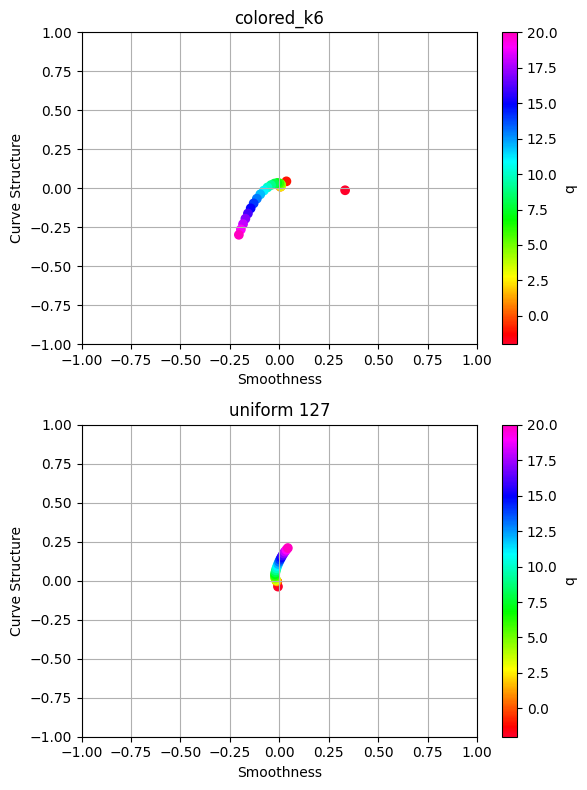

In [13]:
unique_default_images = default_data['image_name'].unique()
fig, axs = plt.subplots(nrows=len(unique_default_images), figsize=(6, 4 * len(unique_default_images)))

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current noise_prob
    df_filtered = default_data[default_data['image_name'] == imageName]

    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    scatter = axs[i].scatter(df_filtered['Smoothness'], df_filtered['Curve structure'], 
                             c=df_filtered['q'], cmap='gist_rainbow')

    # Add colorbar for each subplot
    cbar = fig.colorbar(scatter, ax=axs[i])
    cbar.set_label('q')

    # Set title and labels for the subplot
    axs[i].set_title(f'{imageName}')
    axs[i].set_xlabel('Smoothness')
    axs[i].set_ylabel('Curve Structure')
    axs[i].set_xlim([-1, 1])
    axs[i].set_ylim([-1, 1])
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/speckle/planes/default_images.png', bbox_inches='tight')
# Show the plot
plt.show()

In [6]:
grouped_default = default_data.groupby('q')[['Smoothness', 'Curve structure', 'Weighted Entropy Correct','Weighted Complexity Correct']].mean()
grouped_default = grouped_default.reset_index()
print(f"Original = {default_data.shape}\nGrouped = {grouped_default.shape}")
# Display the result
grouped_default

Original = (46, 9)
Grouped = (23, 5)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct
0,-2.0,0.163158,-0.025033,0.850862,0.113302
1,-1.0,0.012960,0.018500,0.996175,0.004877
2,0.0,-0.004018,0.005840,0.999697,0.000397
3,1.0,-0.003659,0.003434,0.999656,0.000451
4,2.0,-0.003488,0.005759,0.999464,0.000702
5,3.0,-0.003724,0.010542,0.999142,0.001122
6,4.0,-0.004794,0.017041,0.998595,0.001837
7,5.0,-0.007094,0.024454,0.997609,0.003133
8,6.0,-0.010837,0.031778,0.995789,0.005534
9,7.0,-0.016008,0.037970,0.992547,0.009789


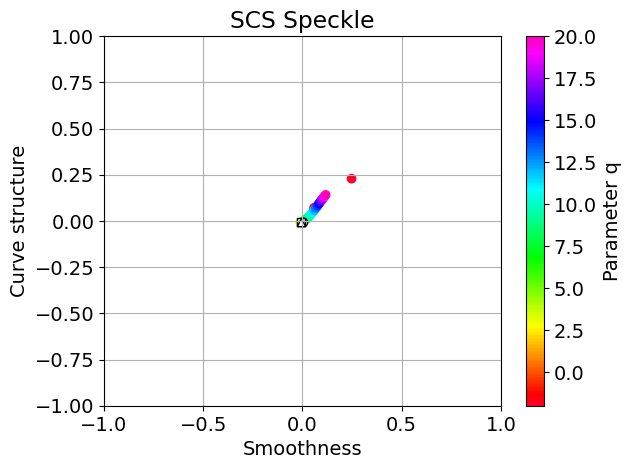

In [22]:
data_ss = grouped_default
plt.figure(1)
plt.rcParams.update({"font.size": 14})
scatter = plt.scatter(data_ss["Smoothness"], data_ss["Curve structure"], c=data_ss['q'], cmap='gist_rainbow')
# Overlay special symbols for points where data_ss['q'] is 0, 1, or 2
special_symbols = {0: 'o', 1: 's', 2: '^'}
for q_value, marker in special_symbols.items():
        subset = data_ss[data_ss['q'] == q_value]
        plt.scatter(subset["Smoothness"], subset["Curve structure"], c='white', edgecolors='black', marker=marker, label=f'q={q_value}')
        plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.grid(True)
plt.xlabel('Smoothness')
plt.ylabel('Curve structure')
plt.title(f'SCS Speckle')
plt.colorbar(scatter, label='Parameter q')
# plt.savefig(f'results/sintorn_dataset/planes/SCS_grouped_{images_class}.png', bbox_inches='tight')
plt.show()

Plotting from images

In [7]:
filenames_dataset = dataset_data.image_name.unique()
print(filenames_dataset)

['canesugar01-r000-s001.png' 'canvas01-r000-s001.png'
 'couscous01-r000-s001.png' 'fabric01-r000-s001.png'
 'fabric02-r000-s001.png' 'fabric03-r000-s001.png'
 'fabric04-r000-s001.png' 'fabric05-r000-s001.png'
 'flaxseed01-r000-s001.png' 'knitwear01-r000-s001.png'
 'knitwear02-r000-s001.png' 'knitwear03-r000-s001.png'
 'lentils01-r000-s001.png' 'oatmeal01-r000-s001.png'
 'pearlsugar01-r000-s001.png' 'rice01-r000-s001.png' 'rug01-r000-s001.png'
 'ryeflakes01-r000-s001.png' 'seeds01-r000-s001.png'
 'seeds02-r000-s001.png' 'sprinkles01-r000-s001.png'
 'tile01-r000-s001.png' 'towel01-r000-s001.png' 'wheat01-r000-s001.png'
 'wool01-r000-s001.png']


In [16]:
chosen_filenames = np.random.choice(filenames_dataset, 10)
print(chosen_filenames)
# dataset_chosen = image_data[image_data['image_name'] == chosen_filename]

['oatmeal01-r000-s001.png' 'knitwear01-r000-s001.png'
 'couscous01-r000-s001.png' 'pearlsugar01-r000-s001.png'
 'wool01-r000-s001.png' 'canesugar01-r000-s001.png'
 'knitwear03-r000-s001.png' 'flaxseed01-r000-s001.png'
 'knitwear02-r000-s001.png' 'rice01-r000-s001.png']


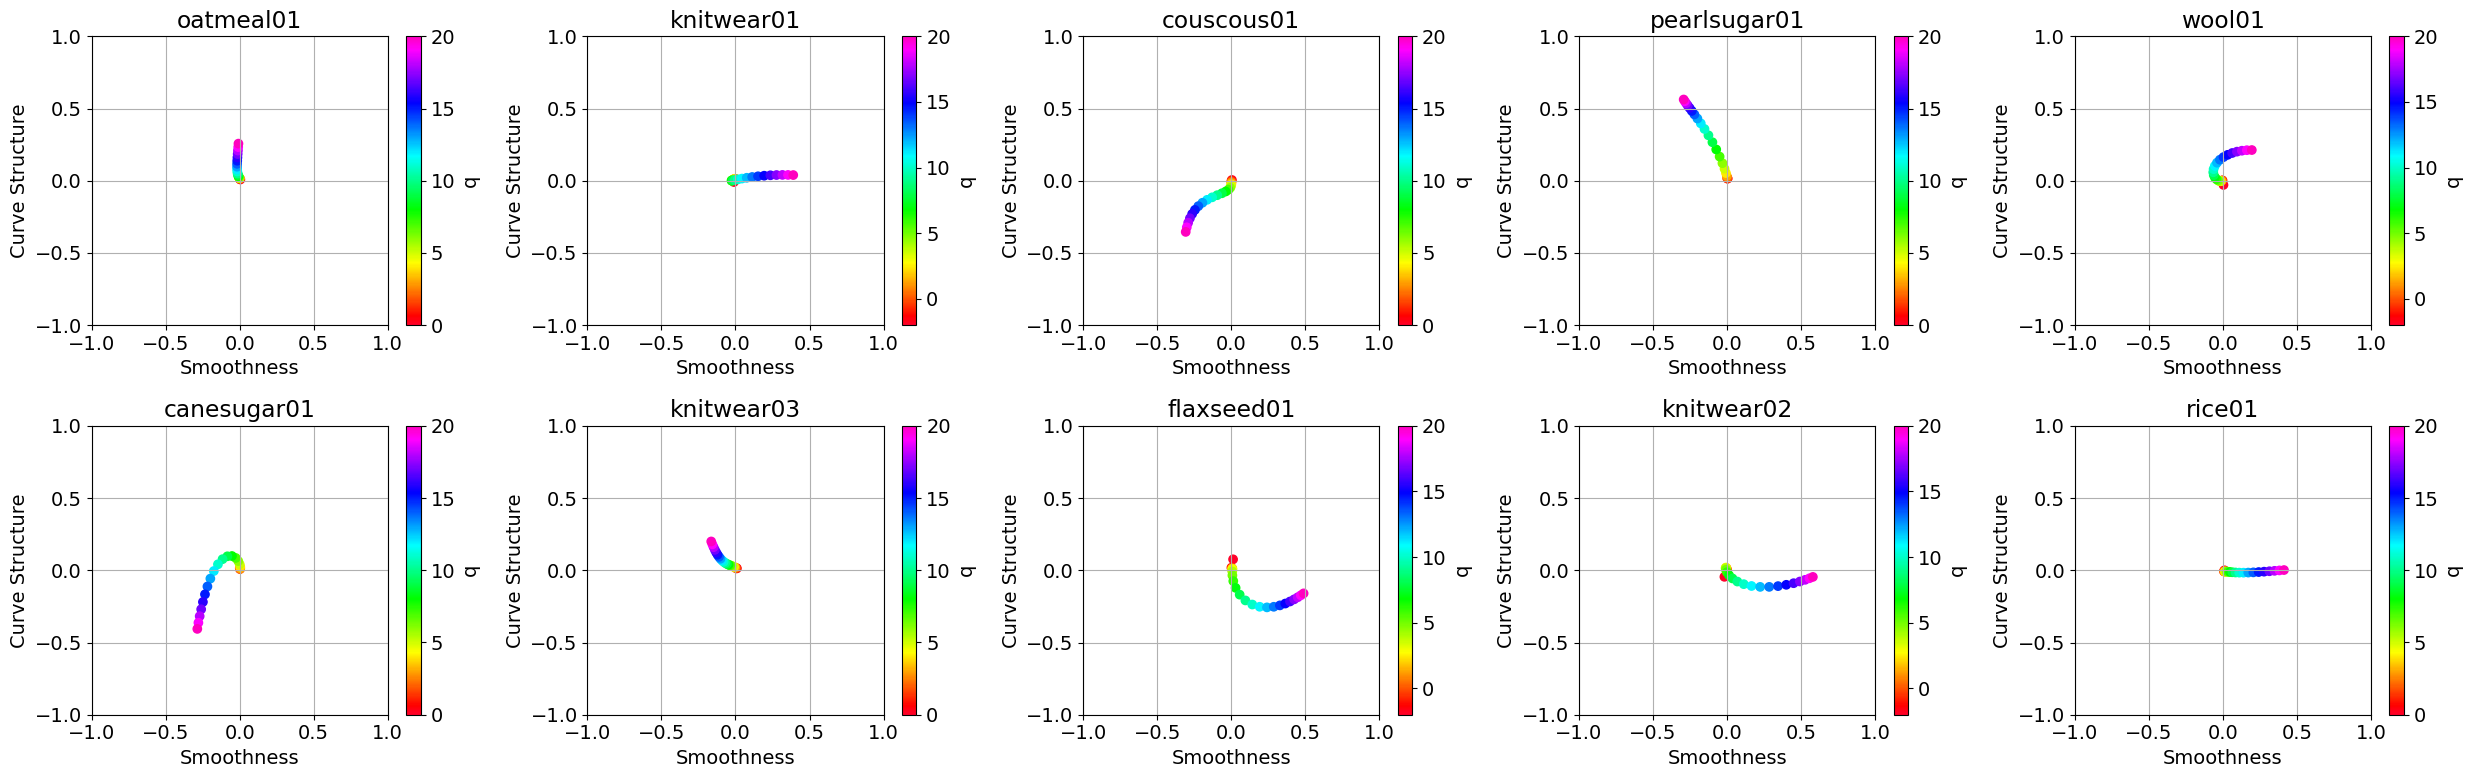

In [36]:
ncolsChosen = 5
nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(25, 4 * nrowsChosen))
# Flatten the axs array for easier indexing
axs = axs.flatten()
for i, imageName in enumerate(chosen_filenames):
    # Filter DataFrame for the current noise_prob
    df_filtered = image_data[image_data['image_name'] == imageName]

    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    scatter = axs[i].scatter(df_filtered['Smoothness'], df_filtered['Curve structure'], 
                             c=df_filtered['q'], cmap='gist_rainbow')

    # Add colorbar for each subplot
    cbar = fig.colorbar(scatter, ax=axs[i])
    cbar.set_label('q')

    # Set title and labels for the subplot
    axs[i].set_title(f'{imageName.split('-')[0]}')
    axs[i].set_xlabel('Smoothness')
    axs[i].set_ylabel('Curve Structure')
    axs[i].set_xlim([-1, 1])
    axs[i].set_ylim([-1, 1])
    axs[i].grid(True)
# Turn off any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/speckle/planes/speckle_dataset_sample.png', bbox_inches='tight')
# Show the plot
plt.show()